# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = f"{url}q={city}&appid={weather_api_key}&units=metric"
        response = requests.get(city_weather).json() 
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | vila velha
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 5 of Set 1 | grand falls-windsor
Processing Record 6 of Set 1 | new kingman-butler
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | lobito
Processing Record 9 of Set 1 | vernon
Processing Record 10 of Set 1 | palmer
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | mocimboa
Processing Record 15 of Set 1 | susuman
Processing Record 16 of Set 1 | la'ie
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | dudinka
Processing Record 19 of Set 1 | yaren
Processing Record 20 of Set 1 | amos
Processing Record 21 of Set 1 | verkhnevilyuysk
Processing Record 22 

Processing Record 39 of Set 4 | jamestown
Processing Record 40 of Set 4 | paola
Processing Record 41 of Set 4 | waiuku
Processing Record 42 of Set 4 | east london
Processing Record 43 of Set 4 | kitahiroshima
Processing Record 44 of Set 4 | aykhal
Processing Record 45 of Set 4 | hithadhoo
Processing Record 46 of Set 4 | sao gabriel da cachoeira
Processing Record 47 of Set 4 | guaruja
Processing Record 48 of Set 4 | kanungu
Processing Record 49 of Set 4 | belyy yar
Processing Record 0 of Set 5 | 'ain benian
Processing Record 1 of Set 5 | nadi
Processing Record 2 of Set 5 | portland
Processing Record 3 of Set 5 | yangambi
Processing Record 4 of Set 5 | ponte nelle alpi-polpet
City not found. Skipping...
Processing Record 5 of Set 5 | abu jibeha
Processing Record 6 of Set 5 | ierapetra
Processing Record 7 of Set 5 | guasdualito
Processing Record 8 of Set 5 | krutinka
Processing Record 9 of Set 5 | nikolayevsk-on-amure
Processing Record 10 of Set 5 | dalandzadgad
Processing Record 11 of Se

Processing Record 28 of Set 8 | silver city
Processing Record 29 of Set 8 | makoua
Processing Record 30 of Set 8 | tamanrasset
Processing Record 31 of Set 8 | manicore
Processing Record 32 of Set 8 | vilyuchinsk
Processing Record 33 of Set 8 | mili
Processing Record 34 of Set 8 | uba
Processing Record 35 of Set 8 | afif
Processing Record 36 of Set 8 | lihue
Processing Record 37 of Set 8 | halifax
Processing Record 38 of Set 8 | ouellah
City not found. Skipping...
Processing Record 39 of Set 8 | mangrol
Processing Record 40 of Set 8 | ko pha ngan
Processing Record 41 of Set 8 | ijui
Processing Record 42 of Set 8 | kish
Processing Record 43 of Set 8 | minas de marcona
Processing Record 44 of Set 8 | westport
Processing Record 45 of Set 8 | ak-dovurak
Processing Record 46 of Set 8 | ulsteinvik
Processing Record 47 of Set 8 | tonning
Processing Record 48 of Set 8 | taft
Processing Record 49 of Set 8 | puerto deseado
Processing Record 0 of Set 9 | yuzhno-kurilsk
Processing Record 1 of Set 9

Processing Record 17 of Set 12 | uliastay
Processing Record 18 of Set 12 | palikir - national government center
Processing Record 19 of Set 12 | kirkwall
Processing Record 20 of Set 12 | byron bay
Processing Record 21 of Set 12 | tokar
Processing Record 22 of Set 12 | bereket
Processing Record 23 of Set 12 | bagerhat
City not found. Skipping...
Processing Record 24 of Set 12 | tommot
Processing Record 25 of Set 12 | kavaje
Processing Record 26 of Set 12 | nicoya
Processing Record 27 of Set 12 | chilliwack
Processing Record 28 of Set 12 | san andres
Processing Record 29 of Set 12 | pan de azucar
Processing Record 30 of Set 12 | mugia
Processing Record 31 of Set 12 | barcelos
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,15.37,84,45,9.43,SH,1686145311
1,vila velha,-20.3297,-40.2925,24.97,66,0,1.54,BR,1686145311
2,bethel,41.3712,-73.4140,17.52,69,0,1.54,US,1686145312
3,grand falls-windsor,48.9332,-55.6649,11.39,92,100,0.89,CA,1686144609
4,new kingman-butler,35.2650,-114.0323,20.66,17,100,2.04,US,1686145312


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.37,84,45,9.43,SH,1686145311
1,vila velha,-20.3297,-40.2925,24.97,66,0,1.54,BR,1686145311
2,bethel,41.3712,-73.4140,17.52,69,0,1.54,US,1686145312
3,grand falls-windsor,48.9332,-55.6649,11.39,92,100,0.89,CA,1686144609
4,new kingman-butler,35.2650,-114.0323,20.66,17,100,2.04,US,1686145312


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

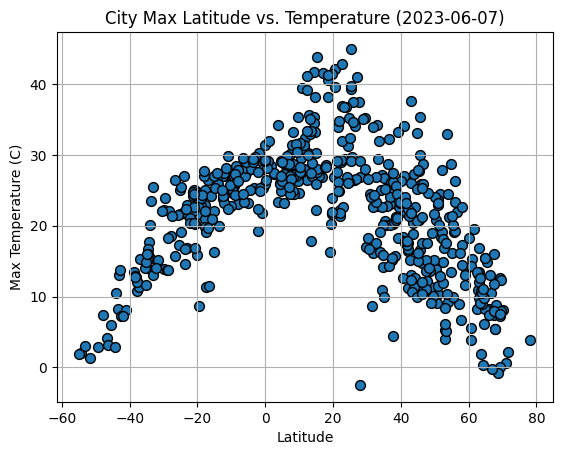

In [8]:
#format the max date in the dataset as "runDate" for graph titles
endrundate = city_data_df["Date"].max()
rundate = datetime.utcfromtimestamp(endrundate).strftime('%Y-%m-%d')
# Build scatter plot for latitude vs. temperature with graph properties
city_data_df.plot(x = 'Lat',y= 'Max Temp',kind = 'scatter',
                  grid = True,xlabel= "Latitude",ylabel = "Max Temperature (C)",
                  title = f"City Max Latitude vs. Temperature ({rundate})",edgecolors='black',s = 50
                  )

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

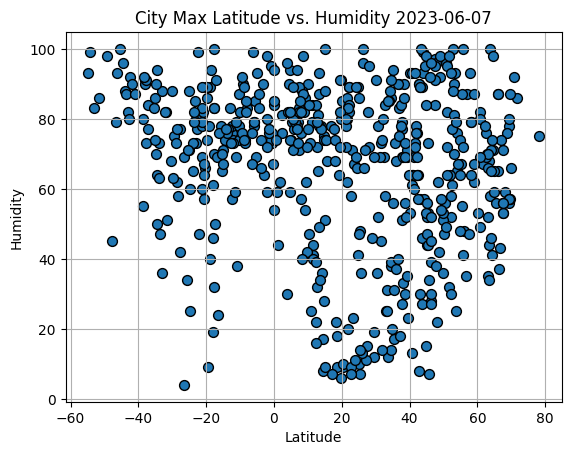

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(x = 'Lat',y= 'Humidity',kind = 'scatter',
                  grid = True,xlabel= "Latitude",ylabel = "Humidity",
                  title = f"City Max Latitude vs. Humidity {(rundate)}",edgecolors='black',s = 50
                  )

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

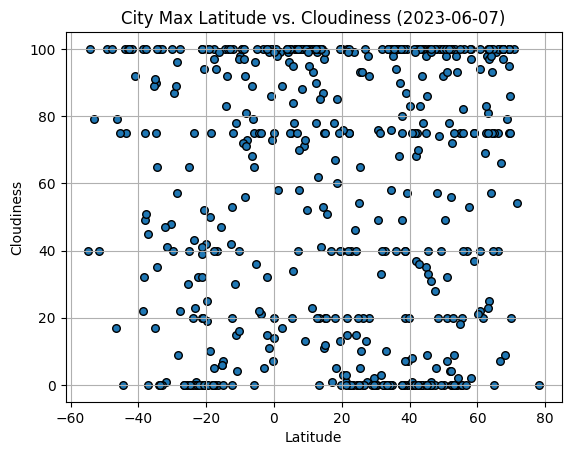

In [10]:

city_data_df.plot(x = 'Lat',y= 'Cloudiness',kind = 'scatter',
                  grid = True,xlabel= "Latitude",ylabel = "Cloudiness",
                  title = f"City Max Latitude vs. Cloudiness ({rundate})",edgecolors='black',s = 30
                  )

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

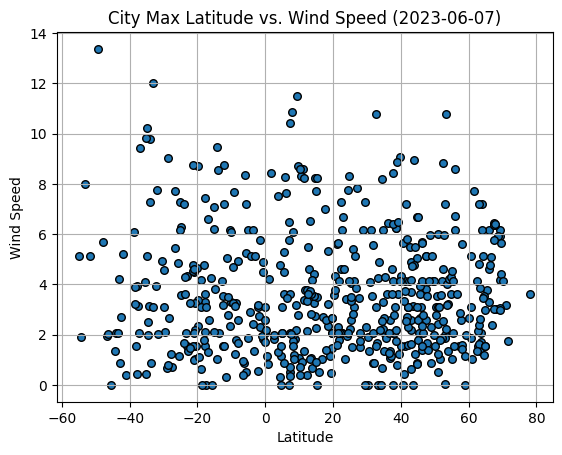

In [11]:
# Build the scatter plots for latitude vs. wind speed

city_data_df.plot(x = 'Lat',y= 'Wind Speed',kind = 'scatter',
                  grid = True,xlabel= "Latitude",ylabel = "Wind Speed",
                  title = f"City Max Latitude vs. Wind Speed ({rundate})",edgecolors='black',s = 30
                  )


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bethel,41.3712,-73.4140,17.52,69,0,1.54,US,1686145312
3,grand falls-windsor,48.9332,-55.6649,11.39,92,100,0.89,CA,1686144609
4,new kingman-butler,35.2650,-114.0323,20.66,17,100,2.04,US,1686145312
7,vernon,50.2581,-119.2691,13.85,47,0,3.09,CA,1686145265
8,palmer,42.1584,-72.3287,16.46,64,75,3.09,US,1686145313


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.37,84,45,9.43,SH,1686145311
1,vila velha,-20.3297,-40.2925,24.97,66,0,1.54,BR,1686145311
5,port-aux-francais,-49.3500,70.2167,2.93,98,100,13.37,TF,1686145312
6,lobito,-12.3481,13.5456,23.72,76,53,3.20,AO,1686145313
11,waitangi,-43.9535,-176.5597,10.46,88,100,2.08,NZ,1686144644


###  Temperature vs. Latitude Linear Regression Plot

In [15]:

# Define function for creating linear agression and scatter plot
def linear_regression_plot(x,y,x_cord,y_cord,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.xlabel("Latitude")
    plt.ylabel(f'{y_label}')
    plt.grid()
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(x_cord,y_cord),fontsize=12,color="red")
   
    

The r-square is -0.7226321255892623
y = -0.35x + 34.61


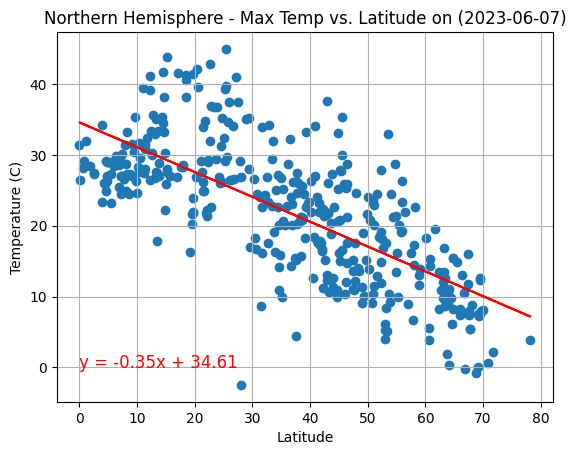

In [21]:
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
y_label = "Temperature (C)"
x_cord = 0
y_cord = 0
linear_regression_plot(x,y,x_cord,y_cord,y_label)
# Set a title
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude on ({rundate})")
plt.show()


The r-square is 0.8469120606777546
y = 0.44x + 29.84


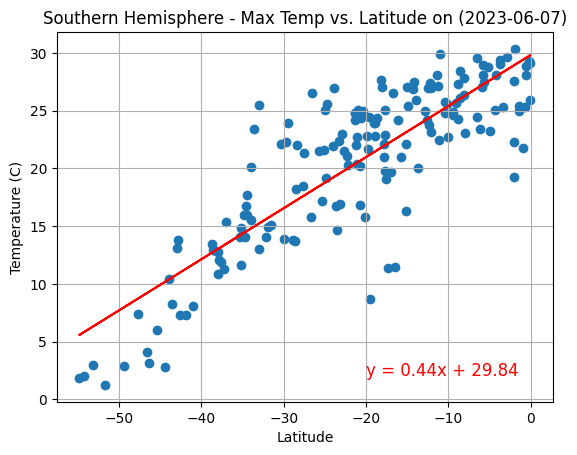

In [23]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
y_label = "Temperature (C)"
x_cord = -20
y_cord = 2
linear_regression_plot(x,y,x_cord,y_cord,y_label)
# Set a title
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude on ({rundate})")
plt.show()

**Discussion:** The result reveals a strong correlation between distance from the equator temperature. The closer to the equator, the higher the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-square is 0.013751150432008249
y = 0.02x + 62.67


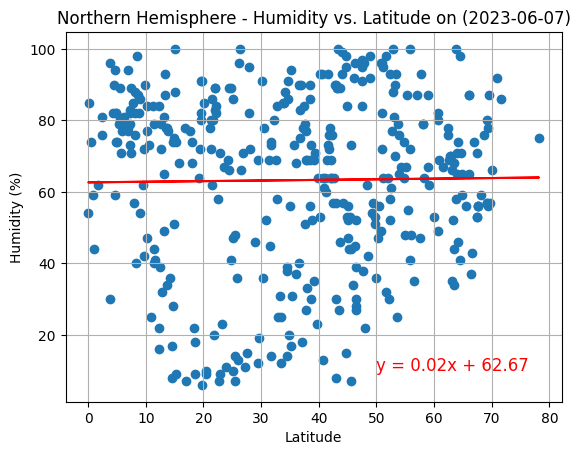

In [34]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
y_label = "Humidity (%)"
x_cord = 50
y_cord = 10
linear_regression_plot(x,y,x_cord,y_cord,y_label)
# Set a title
plt.title(f"Northern Hemisphere - Humidity vs. Latitude on ({rundate})")
plt.show()

The r-square is -0.06587546890010502
y = -0.08x + 72.32


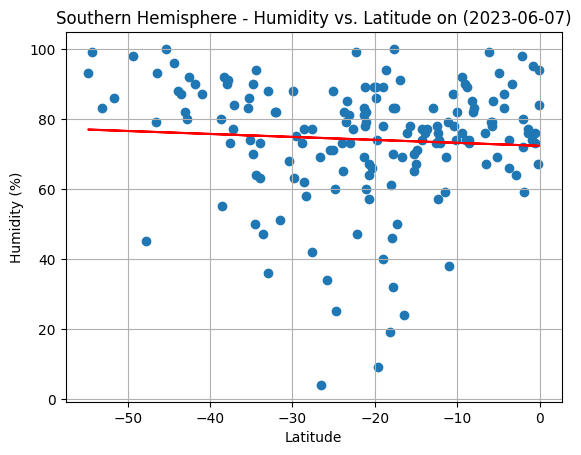

In [36]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
y_label = "Humidity (%)"
x_cord = 20
y_cord = -50
linear_regression_plot(x,y,x_cord,y_cord,y_label)
# Set a title
plt.title(f"Southern Hemisphere - Humidity vs. Latitude on ({rundate})")
plt.show()

**Discussion:** Both in the Northern and Southern hemisphere, there is a weak negative correlation between Humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-square is -0.06167384498135584
y = -0.13x + 63.79


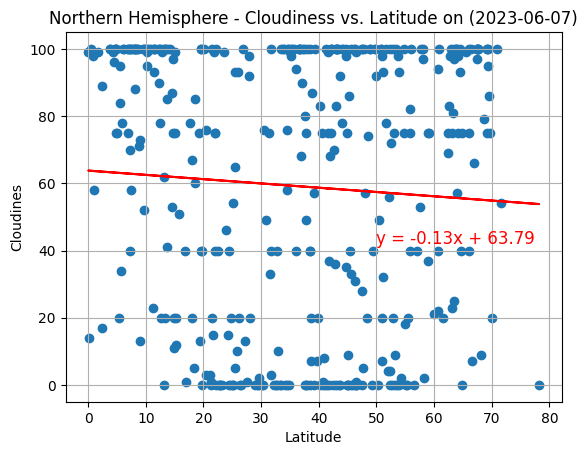

In [39]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
y_label = "Cloudines"
x_cord = 50
y_cord = 42
linear_regression_plot(x,y,x_cord,y_cord,y_label)
# Set a title
plt.title(f"Northern Hemisphere - Cloudiness vs. Latitude on ({rundate})")
plt.show()

The r-square is -0.022229914676332802
y = -0.06x + 51.47


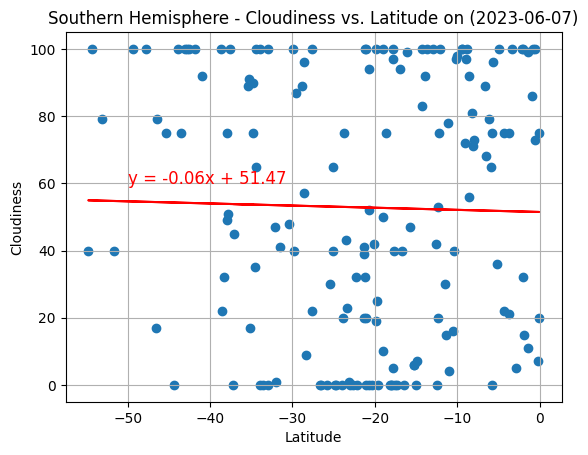

In [41]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
y_label = "Cloudiness"
x_cord = -50
y_cord = 60
linear_regression_plot(x,y,x_cord,y_cord,y_label)
# Set a title
plt.title(f"Southern Hemisphere - Cloudiness vs. Latitude on ({rundate})")
plt.show()

**Discussion:** Both in the Northern and Southern hemisphere, there is a weak negative correlation between cloud cover and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-square is 0.038016092161400505
y = 0.0x + 3.3


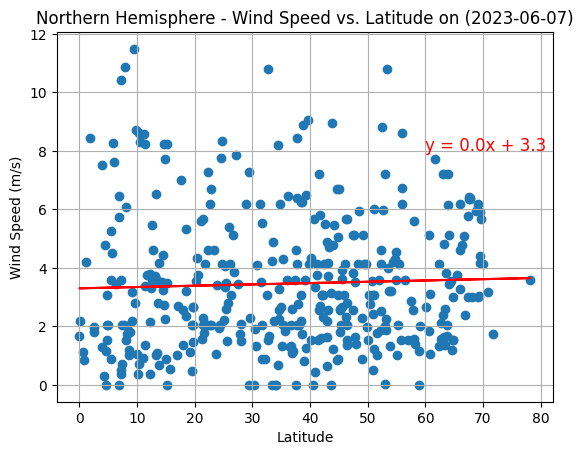

In [43]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
y_label = "Wind Speed (m/s)"
x_cord = 60
y_cord = 8
linear_regression_plot(x,y,x_cord,y_cord,y_label)
# Set a title
plt.title(f"Northern Hemisphere - Wind Speed vs. Latitude on ({rundate})")
plt.show()

The r-square is -0.10082548402293176
y = -0.02x + 3.32


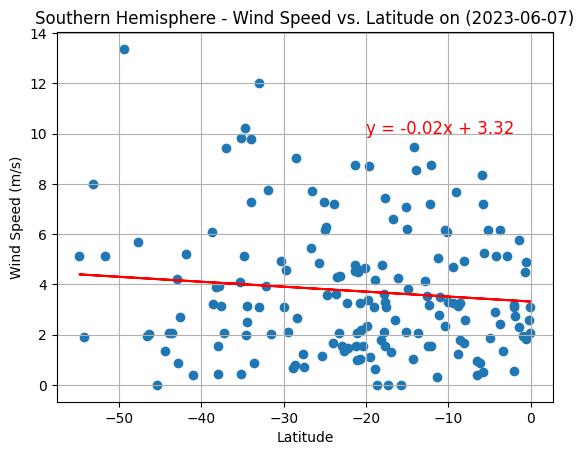

In [45]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
y_label = "Wind Speed (m/s)"
x_cord = -20
y_cord = 10
linear_regression_plot(x,y,x_cord,y_cord,y_label)
# Set a title
plt.title(f"Southern Hemisphere - Wind Speed vs. Latitude on ({rundate})")
plt.show()

**Discussion:** There is a weak relationship between wind speed and latitude in both hemispheres, but in the northern hemisphere there is a positive correlation where as in the southern it is a negative correlation. 